In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stat
import numpy as np
import pandas as pd
#import sklearn.cluster as skcl
#from sklearn.decomposition import PCA,SparsePCA,RandomizedPCA,FactorAnalysis
#from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from __future__ import division

In [2]:
# =================== Constants ===================
GLUCOSE_GROWTH_CURVE = [[0,3,4,5,6,8,24,48,168,336],np.array([0.00267,0.01333,0.02567,0.06167,0.13567,0.19933,0.19500,0.17667,0.15233,0.14567])]
GLUCOSE_GROWTH_CURVE_STDDEV = np.array([0.00058,0.00208,0.00306,0.00058,0.01210,0.00321,0.00100,0.00306,0.00153,0.00208])
GLYCEROL_GROWTH_CURVE = [[3,4,4.5,5,5.5,6,6.5,7,8,9,10,11,28],(np.array([0.017,0.034,0.048,0.063,0.093,0.134,0.167,0.196,0.203,0.205,0.205,0.204,0.198])*2)]
SCALED_GLYCEROL_GROWTH_CURVE = [[0,1,1.5,2,2.5,3,3.25,3.5,4,(4+(1.0/16)),(4+(2.0/16)),(4+(3.0/16)),(5+(1.0/6))],(np.array([0.017,0.034,0.048,0.063,0.093,0.134,0.167,0.196,0.203,0.205,0.205,0.204,0.198])*2)]
TIMES = [3,4,5,6,8,24,48,168,336]



In [3]:
unmodified_pepts_fdr1 = pd.read_pickle("data/unmodified_pept_fdr1.pck")
unmodified_posn_fdr1 = pd.read_pickle("data/unmodified_posn_fdr1.pck")
modified_pepts_fdr1 = pd.read_pickle("data/modified_pept_fdr1.pck")
all_pept_fdr1 = pd.read_pickle("data/all_pept_fdr1.pck")

### Spectrum of mass shifts, pooled across timepoints and replicates

In [4]:
"""
def build_modification_spectrum(pept_df):
    mod_spectrum_by_timepoint_biorep = pept_df.groupby(['MassShift','Time','BiolRep']).count().Index
    all_time_sum_biorep = mod_spectrum_by_timepoint_biorep.unstack().sum(level='MassShift')
    all_time_sum_pooled = mod_spectrum_by_timepoint_biorep.fillna(0).sum(level='MassShift')
    all_time_sum_pooled = all_time_sum_pooled.reindex(index=np.arange(-200,200),fill_value=0)
    all_time_sum_pooled[0] = 0
    return (all_time_sum_biorep,all_time_sum_pooled)

def plot_1D_modification_spectrum(df):
    plt.bar(df.index,df,width=1,linewidth=0)
    ax1 = plt.gca()
    plt.ylabel("Peptide Count", fontsize=36)
    plt.xlabel("Mass Shift (Da)", fontsize=36)
    top5 = df.sort(inplace=False).head()
    prettify(ax1)
"""    
def prettify(axis):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.tick_params(top='off',right='off',which='both')
    #axis.set_yticklabels(axis.get_yticks(),fontsize=24)
    #axis.set_xticklabels(axis.get_xticks(),fontsize=24)
   
def color_cycle(cmap,N):
    """
    make a color iterator for the given colormap with N levels
    
    cmap: matplotlib.colors.Colormap object
    N: number of colors to cycle

    note that an EndIteration exception will be thrown when all the colors have cycled
    """
    c = 0
    r = np.arange(0,N,dtype=np.float)
    for st in r:
        yield cmap(st/N,1)

"""
def plot_shiftspect_heatmap(spect_df,sort=None):
    if sort:
        spect_df = sort(spect_df)
    plt.imshow(np.log2(spect_df.as_matrix()),interpolation='none',aspect='auto',vmax=16)
    plt.yticks(np.arange(len(spect_df.index)),spect_df.index)
    plt.xticks(np.arange(len(spect_df.columns)),spect_df.columns)
    
def get_shift_x_time_spectrum(pept_df):
    modspect_time_biorep = pept_df.groupby(['MassShift','Time','BiolRep']).count().Index
    modspect_time_biorep = modspect_time_biorep.unstack()
    modspect_time_biorep = modspect_time_biorep.unstack()
    modspect_time_pool = pept_df.groupby(['MassShift','Time']).count().Index
    modspect_time_pool = modspect_time_pool.unstack()
    return (modspect_time_biorep, modspect_time_pool)

def get_shift_x_AA_x_time_spectrum(pept_df):
    modspect_time_biorep = pept_df.groupby(['MassShift','ModifiedResidue','Time','BiolRep']).count().Index
    modspect_time_biorep = modspect_time_biorep.unstack()
    modspect_time_biorep = modspect_time_biorep.unstack()
    modspect_time_biorep.fillna(0)
    modspect_time_pool = pept_df.groupby(['MassShift','ModifiedResidue','Time']).count().Index
    modspect_time_pool = modspect_time_pool.unstack()
    modspect_time_pool.fillna(0)
    return (modspect_time_biorep, modspect_time_pool)
"""

"\ndef plot_shiftspect_heatmap(spect_df,sort=None):\n    if sort:\n        spect_df = sort(spect_df)\n    plt.imshow(np.log2(spect_df.as_matrix()),interpolation='none',aspect='auto',vmax=16)\n    plt.yticks(np.arange(len(spect_df.index)),spect_df.index)\n    plt.xticks(np.arange(len(spect_df.columns)),spect_df.columns)\n    \ndef get_shift_x_time_spectrum(pept_df):\n    modspect_time_biorep = pept_df.groupby(['MassShift','Time','BiolRep']).count().Index\n    modspect_time_biorep = modspect_time_biorep.unstack()\n    modspect_time_biorep = modspect_time_biorep.unstack()\n    modspect_time_pool = pept_df.groupby(['MassShift','Time']).count().Index\n    modspect_time_pool = modspect_time_pool.unstack()\n    return (modspect_time_biorep, modspect_time_pool)\n\ndef get_shift_x_AA_x_time_spectrum(pept_df):\n    modspect_time_biorep = pept_df.groupby(['MassShift','ModifiedResidue','Time','BiolRep']).count().Index\n    modspect_time_biorep = modspect_time_biorep.unstack()\n    modspect_time_bi

## Fisher's Exact Test for Stationary vs. Exponential / Modified vs. Unmodified (by mass shift x AA pairs)

In [5]:
SINGLE_LETTER_AAs = ['G','A','S','T','C','V','L','I','M','P','F','Y','W','D','E','N','Q','H','K','R']

def filter_peptNt_mods(mod_df,keep_prot_Nt=True):
    mod_df_peptNt_flt = None
    if keep_prot_Nt:
        mod_df_peptNt_flt = mod_df[((mod_df['ModifiedPosition'] > 2) |
                                    (mod_df['ModPosn_ProtCoord'] <= 2))]
    else:
        mod_df_peptNt_flt = mod_df[(mod_df['ModifiedPosition'] > 2)]
    return mod_df_peptNt_flt.dropna()

def posn_massshift_exp_sta_FEpval(mod_df, unmod_prot_posn_df):
    nmod_posn_locgrp = mod_df.groupby(['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','MassShift','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
    # Go back and track this down later
    unmod_prot_posn_nmod_posn_idx = unmod_prot_posn_df.reindex_axis(nmod_posn_locgrp.index,axis=0,method='ffill')['unmodCount']
    posn_modFET = pd.DataFrame(index=unmod_prot_posn_nmod_posn_idx.index,columns=pd.MultiIndex.from_product([[1,2,3],['ExpMod','ExpUnmod','StaMod','StaUnmod','twotail_pValue','greater_pValue','less_pValue']],sortorder=0,names=['BiolRep','PeptCounts']))
    
    for i in (1,2,3):
        posn_modFET.loc[:,(i,"ExpMod")] = nmod_posn_locgrp.loc[:,(i,[3,4,5,6])].sum(axis=1)
        posn_modFET.loc[:,(i,"StaMod")] = nmod_posn_locgrp.loc[:,(i,[24,48,168,336])].sum(axis=1)
        posn_modFET.loc[:,(i,"ExpUnmod")] = unmod_prot_posn_nmod_posn_idx.loc[:,(i,[3,4,5,6])].sum(axis=1)
        posn_modFET.loc[:,(i,"StaUnmod")] = unmod_prot_posn_nmod_posn_idx.loc[:,(i,[24,48,168,336])].sum(axis=1)
        posn_modFET.loc[:,(i,"FET_logodds")] = posn_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[0]),axis=1)
        posn_modFET.loc[:,(i,"twotail_pValue")] = posn_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[1]),axis=1)

        #posn_modFET.loc[:,(i,"greater_pValue")] = posn_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='greater')[1]),axis=1)
        #posn_modFET.loc[:,(i,"less_pValue")] = posn_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='less')[1]),axis=1)

    print posn_modFET.head()
    posn_AA_Mass_modFET = posn_modFET.sum(level=['MassShift','ModifiedResidue'])
    posn_AA_mod_shiftspectrum = nmod_posn_locgrp.sum(level=['MassShift','ModifiedResidue'])
    posn_AA_unmod_shiftspectrum = unmod_prot_posn_nmod_posn_idx.sum(level=['MassShift','ModifiedResidue'])
    for i in (1,2,3):
        posn_AA_Mass_modFET.loc[:,(i,"twotail_pValue")]= posn_AA_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[1]),axis=1)
        posn_AA_Mass_modFET.loc[:,(i,"FET_logodds")]= posn_AA_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[0]),axis=1)

        #posn_AA_Mass_modFET.loc[:,(i,"greater_pValue")]= posn_AA_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='greater')[1]),axis=1)
        #posn_AA_Mass_modFET.loc[:,(i,"less_pValue")]= posn_AA_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='less')[1]),axis=1)
    print posn_AA_Mass_modFET
    
    posn_Mass_modFET = posn_modFET.sum(level=['MassShift',])
    posn_Mass_mod_shiftspectrum = nmod_posn_locgrp.sum(level=['MassShift'])
    posn_Mass_unmod_shiftspectrum = unmod_prot_posn_nmod_posn_idx.sum(level=['MassShift'])
    for i in (1,2,3):
        posn_Mass_modFET.loc[:,(i,"twotail_pValue")]= posn_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[1]),axis=1)
        posn_Mass_modFET.loc[:,(i,"FET_logodds")]= posn_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]))[0]),axis=1)
        #posn_Mass_modFET.loc[:,(i,"greater_pValue")]= posn_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='greater')[1]),axis=1)
        #posn_Mass_modFET.loc[:,(i,"less_pValue")]= posn_Mass_modFET[i].apply((lambda x:stat.fisher_exact(np.array([[x.loc['ExpMod'],x.loc['ExpUnmod']],[x.loc['StaMod'],x.loc['StaUnmod']]]),alternative='less')[1]),axis=1)
    print posn_Mass_modFET

    posn_modFET.sort_index(axis=1,inplace=True),
    nmod_posn_locgrp.sort_index(axis=1,inplace=True)
    unmod_prot_posn_nmod_posn_idx.sort_index(axis=1,inplace=True)
    posn_AA_Mass_modFET.sort_index(axis=1,inplace=True)
    posn_AA_mod_shiftspectrum.sort_index(axis=1,inplace=True)
    posn_AA_unmod_shiftspectrum.sort_index(axis=1,inplace=True)
    posn_Mass_modFET.sort_index(axis=1,inplace=True)
    posn_Mass_mod_shiftspectrum.sort_index(axis=1,inplace=True)
    posn_Mass_unmod_shiftspectrum.sort_index(axis=1,inplace=True)
    
    return (posn_modFET,
            nmod_posn_locgrp,
            unmod_prot_posn_nmod_posn_idx,
            posn_AA_Mass_modFET,
            posn_AA_mod_shiftspectrum,
            posn_AA_unmod_shiftspectrum,
            posn_Mass_modFET,
            posn_Mass_mod_shiftspectrum,
            posn_Mass_unmod_shiftspectrum)

In [6]:
posn_modFET_fdr1,posn_time_mod_fdr1,posn_time_unmod_fdr1,posn_AA_Mass_modFET_fdr1,posn_AA_Mass_time_mod_fdr1,posn_AA_Mass_time_unmod_fdr1,posn_Mass_modFET_fdr1,posn_Mass_time_mod_fdr1,posn_Mass_time_unmod_fdr1 = posn_massshift_exp_sta_FEpval(modified_pepts_fdr1,unmodified_posn_fdr1)

BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  32                Q               -17          0.0      0.0   
                70                I                28          0.0     21.0   
                                                   29          0.0     21.0   
                                                   124         0.0     21.0   
                                                   125         0.0     21.0   

BiolRep                                                                      \
PeptCounts                                                  StaMod StaUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  32                Q               -17          0.0      0.0   
                70                I                

In [8]:
print modified_pepts_fdr1.shape
modified_pepts_fdr1_peptNtflt = filter_peptNt_mods(modified_pepts_fdr1)
print modified_pepts_fdr1_peptNtflt.shape
posn_modFET_fdr1_peptNtflt,posn_time_mod_fdr1_peptNtflt,posn_time_unmod_fdr1_peptNtflt,posn_AA_Mass_modFET_fdr1_peptNtflt,posn_AA_Mass_time_mod_fdr1_peptNtflt,posn_AA_Mass_time_unmod_fdr1_peptNtflt,posn_Mass_modFET_fdr1_peptNtflt,posn_Mass_time_mod_fdr1_peptNtflt,posn_Mass_time_unmod_fdr1_peptNtflt = posn_massshift_exp_sta_FEpval(modified_pepts_fdr1_peptNtflt,unmodified_posn_fdr1)

(197176, 30)
(138630, 30)
BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  76                T               125          0.0     21.0   
                77                G               22           0.0     21.0   
                78                L               38           0.0     21.0   
                80                A               22           0.0     21.0   
                81                A               1            0.0     20.0   

BiolRep                                                                      \
PeptCounts                                                  StaMod StaUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  76                T               125          0.0     10.0   
                77       

In [9]:
# Extract Groups of Parent Peptides for each modified position - to use in single-mass shift tables later

mod_posn_groups = modified_pepts_fdr1.groupby(by=['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','MassShift'])
peptide_string = []
for (i,grp) in enumerate(mod_posn_groups):
    pepts = list(set(grp[1].Peptide))
    peptide_string.append((i,(grp[0][0],grp[0][1],grp[0][2],grp[0][3],grp[0][4],",".join(pepts))))
posn_peptides = pd.DataFrame.from_items(peptide_string,orient='index',columns=['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','MassShift','ParentPeptides'])
posn_peptides.set_index(['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','MassShift'],inplace=True)
posn_modFET_fdr1_peptNtflt[("All","ParentPeptides")] = posn_peptides
print posn_modFET_fdr1_peptNtflt

BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  76                T                125         0.0     21.0   
                77                G                22          0.0     21.0   
                78                L                38          0.0     21.0   
                80                A                22          0.0     21.0   
                81                A                1           0.0     20.0   
                                                   22          1.0     20.0   
                82                Q                22          0.0     21.0   
                84                G                22          0.0     21.0   
                106               H                1           0.0     29.0   
                107               G                1

# Figures 6 & 7, Tables 6 & 7

### Abundance of mass shifts across the growth cycle (for significantly Stationary or Exponential-biased modifications)

In [10]:
#pd.DataFrame.dropna()
"""
def plot_FE_consistent_shifts(FE_pvals,spectrum_mod,spectrum_unmod,FE_alpha=0.05):
    #consistent_bioreps = FE_pvals['pValue'].unstack()
    FE_pvals.sort_index(inplace=True,axis=1)
    consistent_bioreps = FE_pvals[FE_pvals < 0.05].dropna(how='any')
    print consistent_bioreps.to_string()
    modspect_time_biorep_df = spectrum_mod / (spectrum_mod + spectrum_unmod)
    print modspect_time_biorep_df

    set_len = len(consistent_bioreps.index.values) + 1
    col = color_cycle(cm.Paired,set_len)

    plt.gcf().set_figheight(set_len*1.2)
    plt.gcf().set_figwidth(5)
    print modspect_time_biorep_df
    print str(modspect_time_biorep_df.loc[consistent_bioreps.index.values,(slice(None),slice(None))].max().max())
    print len(str(modspect_time_biorep_df.loc[consistent_bioreps.index.values,(slice(None),slice(None))].max().max()))
    ymax_digits = len(str(modspect_time_biorep_df.loc[consistent_bioreps.index.values,(slice(None),slice(None))].max().max()))
    for (i,ms) in enumerate(consistent_bioreps.index.values):
        plt.subplot(set_len,1,i+1)
        cur_col = col.next()
        plt.plot(TIMES,modspect_time_biorep_df.loc[ms,(1,slice(None))],'-',color=cur_col,label='Biol. Rep. 1')
        plt.plot(TIMES,modspect_time_biorep_df.loc[ms,(2,slice(None))],'--',color=cur_col,label='Biol. Rep. 2')
        plt.plot(TIMES,modspect_time_biorep_df.loc[ms,(3,slice(None))],':',color=cur_col,label='Biol. Rep. 3')
        plt.xscale('log',basex=2)
        plt.xticks(TIMES,TIMES)
        ymax = modspect_time_biorep_df.loc[ms,(slice(None),slice(None))].max()
        plt.ylim(0,ymax * 1.1)
        plt.yticks([0,ymax],['0',((" " * (ymax_digits - len(str(ymax))))+str(ymax))])
        plt.ylabel('{:+d} Da'.format(ms),rotation=0,verticalalignment='center',horizontalalignment='right',fontsize=12)
        clausify(plt.gca())
    return consistent_bioreps
"""

def plot_FE_consistent_shifts_x_AAs(consistent_bioreps,spectrum_mod,spectrum_unmod):
    modspect_time_biorep_df = spectrum_mod / (spectrum_mod + spectrum_unmod)

    set_len = len(consistent_bioreps.index.values) + 1
    col = color_cycle(cm.Paired,set_len)

    plt.gcf().set_figheight(set_len*1.7)
    plt.gcf().set_figwidth(5)
    print str(consistent_bioreps.index.values.max())
    print len(str(consistent_bioreps.index.values.max()))
    ymax_digits = len(str(modspect_time_biorep_df.loc[consistent_bioreps.index.values,(slice(None),slice(None))].max().max()))
    for (i,(ms,aa)) in enumerate(consistent_bioreps.index.values):
        plt.subplot(set_len,1,i+1)
        cur_col = col.next()
        plt.plot(TIMES,modspect_time_biorep_df.loc[(ms,aa),(1,slice(None))],'-',color=cur_col,label='Biol. Rep. 1',linewidth=2)
        plt.plot(TIMES,modspect_time_biorep_df.loc[(ms,aa),(2,slice(None))],'--',color=cur_col,label='Biol. Rep. 2',linewidth=2)
        plt.plot(TIMES,modspect_time_biorep_df.loc[(ms,aa),(3,slice(None))],':',color=cur_col,label='Biol. Rep. 3',linewidth=2)
        plt.xscale('log',basex=2)
        plt.xticks(TIMES,TIMES)
        ymax = modspect_time_biorep_df.loc[(ms,aa),(slice(None),slice(None))].max()
        plt.ylim(0,ymax * 1.1)
        plt.yticks([0,ymax],['0',"%.2f" % (ymax,)])
        print (aa,ms)
        plt.ylabel('{:s} {:+d} Da'.format(aa,ms),rotation=0,verticalalignment='center',horizontalalignment='right',fontsize=12)
        prettify(plt.gca())
    plt.xlabel("Growth Time (Hours Post-Innoculation)", fontsize=18)
    return consistent_bioreps
"""
def plot_single_massshift(shift,spectrum_mod,spectrum_unmod,outfile,colors,legend_loc='lower right',biorep_by_color=True,set_ylim=None):
    modspect_time_biorep_df = spectrum_mod / (spectrum_mod + spectrum_unmod)
    modspect_time_biorep_shift = modspect_time_biorep_df.ix[shift]   
    print modspect_time_biorep_shift.loc[(1,slice(None))]
    plot_col = colors.next()
    line_styles = {1:"-",2:"--",3:":"}
    line_st = line_styles[1]
    for i in 1,2,3:
        #print modspect_time_biorep_shift[i]
        if not biorep_by_color:
            line_st = line_styles[i]
        plt.plot(TIMES,modspect_time_biorep_shift.loc[(i,slice(None))],color=plot_col,linestyle=line_st,linewidth=5,label="Biol. Rep. %d" % (i,))
        if biorep_by_color:
            plot_col=colors.next()

    ax1 = plt.gca()
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(top='off',right='off')
    plt.ylabel("Per-Position Stoichiometric Proportion", fontsize=36)
    plt.xlabel("Growth Time (hours)", fontsize=36)
    plt.xscale("log",base=2)
    if not set_ylim:
        plt.ylim(0,plt.ylim()[1])
    else:
        plt.ylim(*set_ylim)
    ax1.tick_params(bottom='off', which='minor',reset=True)
    ax1.tick_params(top='off',right='off', which='both')
    ax1.set_xticks(TIMES)
    ax1.set_yticklabels(ax1.get_yticks(),fontsize=24)
    ax1.set_xticklabels(ax1.get_xticks(),fontsize=24)
    plt.legend(fontsize=24,loc=legend_loc)
    plt.savefig(outfile,format='pdf',bbox_inches='tight',pad_inches=.5)
"""
#def plot_single_massshift_AA(shift,spectrum_mod,spectrum_unmod,outfile,colors)
#    modspect_time_biorep_df = spectrum_mod / (spectrum_mod + spectrum_unmod)
#    modspect_time_biorep_shift = modspect_time_biorep_df.ix[shift]   

def get_FDR_cut(FE_pvals,target_FDR=0.01):
    # BH step-up procedure for calculating FDR
    sorted_FE_pvals = FE_pvals.sort(inplace=False)
    cur_FDR_pcut = 0
    cur_p = 0
    m = FE_pvals.shape[0]
    i=0
    for (i,p) in enumerate(sorted_FE_pvals.values):
        next_FDR_pcut = ((i + 1)/m)*target_FDR
        print (p, i, cur_FDR_pcut, next_FDR_pcut)
        if p > next_FDR_pcut:
            break
        else:
            cur_FDR_cut = next_FDR_pcut
            cur_p = p
    return (cur_p,cur_FDR_pcut,sorted_FE_pvals.iloc[:i])

def filter_consistent(FE_logodds,logodds_dir='greater'):
    if logodds_dir == 'greater':
        consistent_logodds = FE_logodds[FE_logodds > 1].dropna(how='any')
    elif logodds_dir == 'less':
        consistent_logodds = FE_logodds[FE_logodds < 1].dropna(how='any')
    return consistent_logodds
#plt.savefig("figures/consistent_FE_pval_bioreps_timeplot.pdf",format='pdf')

#def plot_proteins(posn_Mass_time_mod_fdr1,posn_Mass_time_unmod_fdr1,locus_list):
#    prot_totals = 

def build_FE_pval_table(modFET_df,pval_name):
    FE_df = modFET_df.stack('BiolRep')
    #FE_pval_biorep_idx = pd.MultiIndex.from_product([FE_df.index.values,[1,2,3]],sortorder=0,names=['MassShift','Replicate'])
    FE_pval_biorep = pd.DataFrame(index=FE_df.index,columns=['Exponential','Stationary','pValue'])
    print FE_pval_biorep
    
    for (idx, r) in FE_df.iterrows():
        exp_modified = FE_df.loc[idx,'ExpMod']
        exp_total = FE_df.loc[idx,'ExpMod'] + FE_df.loc[idx,'ExpUnmod']
        exp_pct = (exp_modified / exp_total) * 100
        
        sta_modified =  FE_df.loc[idx,'StaMod']
        sta_total = FE_df.loc[idx,'StaMod'] + FE_df.loc[idx,'StaUnmod']
        sta_pct = (sta_modified / sta_total) * 100
        
        FE_pval_biorep.loc[idx,'pValue'] = "%.2e" % (FE_df.loc[idx,pval_name],)
        FE_pval_biorep.loc[idx,'Exponential'] = "%d/%d (%.2f%%)" % (exp_modified,exp_total,exp_pct)
        FE_pval_biorep.loc[idx,'Stationary'] = "%d/%d (%.2f%%)" % (sta_modified,sta_total,sta_pct)

    return FE_pval_biorep

In [11]:
reps_ls = []
for b in (1,2,3):
    fdr_cut = get_FDR_cut(posn_AA_Mass_modFET_fdr1_peptNtflt.loc[slice(None),(b,'twotail_pValue')],target_FDR=0.05)
    print fdr_cut
    reps_ls.append(fdr_cut[2])
reps = pd.concat(reps_ls,axis=1).dropna(how='any')
rep_flt = posn_AA_Mass_modFET_fdr1_peptNtflt.reindex_axis(reps.index)
rep_flt.sortlevel(level='BiolRep',axis=1,inplace=True)
print rep_flt
consistent_ExpLTSta = filter_consistent(rep_flt.loc[slice(None),(slice(None),'FET_logodds')],logodds_dir='less')
consistent_ExpGTSta = filter_consistent(rep_flt.loc[slice(None),(slice(None),'FET_logodds')])


(8.1082609026759908e-36, 0, 0, 5.1440329218107e-05)
(1.2096458483911141e-31, 1, 0, 0.000102880658436214)
(2.8495151931817926e-30, 2, 0, 0.00015432098765432098)
(5.8055066984569843e-23, 3, 0, 0.000205761316872428)
(1.1515967767840224e-13, 4, 0, 0.000257201646090535)
(5.7322050562887959e-13, 5, 0, 0.00030864197530864197)
(1.056910523439741e-11, 6, 0, 0.000360082304526749)
(3.534561771228586e-10, 7, 0, 0.000411522633744856)
(1.3313466141227986e-09, 8, 0, 0.000462962962962963)
(1.9941891772371781e-09, 9, 0, 0.00051440329218107)
(2.3642969260422513e-09, 10, 0, 0.000565843621399177)
(1.8058761642058071e-08, 11, 0, 0.0006172839506172839)
(1.3643287299789804e-07, 12, 0, 0.000668724279835391)
(1.6044222784765459e-07, 13, 0, 0.000720164609053498)
(9.9391417778470656e-07, 14, 0, 0.0007716049382716049)
(3.1716188251714355e-06, 15, 0, 0.000823045267489712)
(4.1515639015178544e-06, 16, 0, 0.0008744855967078189)
(9.7018004422617625e-06, 17, 0, 0.000925925925925926)
(1.3028698940749788e-05, 18, 0, 0.0

/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:104: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


(16, 'W')
9
('W', 16)
BiolRep                        1                                       \
PeptCounts                ExpMod ExpUnmod FET_logodds StaMod StaUnmod   
MassShift ModifiedResidue                                               
16        W                285.0   6551.0    1.495829  248.0   8527.0   

BiolRep                                       2                              \
PeptCounts                twotail_pValue ExpMod ExpUnmod FET_logodds StaMod   
MassShift ModifiedResidue                                                     
16        W                     0.000006  238.0   5944.0    2.016502  141.0   

BiolRep                                                3                       \
PeptCounts                StaUnmod twotail_pValue ExpMod ExpUnmod FET_logodds   
MassShift ModifiedResidue                                                       
16        W                 7101.0   4.309408e-11  282.0   5900.0     2.66519   

BiolRep                                    

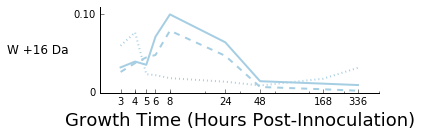

In [12]:
posn_AA_Mass_modFET_fdr1_peptNtflt.sortlevel(level='BiolRep',axis=1,inplace=True)
posn_AA_Mass_modFET_cons_ExpGTSta_pv = plot_FE_consistent_shifts_x_AAs(consistent_ExpGTSta,
                                                                       posn_AA_Mass_time_mod_fdr1_peptNtflt,
                                                                       posn_AA_Mass_time_unmod_fdr1_peptNtflt,
                                                                       )
plt.savefig('figures/FIG_6_posn_AA_Mass_modFET_cons_ExpGTSta_timeplots.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5)

posn_AA_Mass_modFET_cons_ExpGTSta = posn_AA_Mass_modFET_fdr1.reindex_axis(posn_AA_Mass_modFET_cons_ExpGTSta_pv.index)
print posn_AA_Mass_modFET_cons_ExpGTSta

posn_AA_Mass_modFET_cons_ExpGTSta_table = build_FE_pval_table(posn_AA_Mass_modFET_cons_ExpGTSta,'twotail_pValue')
posn_AA_Mass_modFET_cons_ExpGTSta_table.to_csv('data/TABLE_6_posn_AA_Mass_modFET_cons_ExpGTSta_table.csv')

(48, 'C')
9
('N', 1)
('A', 42)
('S', 42)
('T', 42)
('C', 48)
BiolRep                         1                                        \
PeptCounts                 ExpMod ExpUnmod FET_logodds  StaMod StaUnmod   
MassShift ModifiedResidue                                                 
1         N                1273.0  44465.0    0.634797  2260.0  50111.0   
42        A                  55.0    206.0    0.343920    59.0     76.0   
          S                 176.0    409.0    0.283315   322.0    212.0   
          T                   0.0    244.0    0.000000    57.0    306.0   
48        C                  15.0   1589.0    0.215822    51.0   1166.0   

BiolRep                                        2                               \
PeptCounts                twotail_pValue  ExpMod ExpUnmod FET_logodds  StaMod   
MassShift ModifiedResidue                                                       
1         N                 2.489921e-38  1133.0  30842.0    0.771050  1663.0   
42        A   

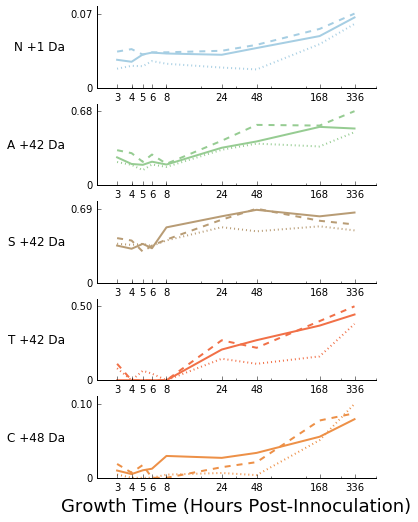

In [13]:
posn_AA_Mass_modFET_fdr1_peptNtflt.sortlevel(level='BiolRep',axis=1,inplace=True)
posn_AA_Mass_modFET_cons_ExpLTSta_pv = plot_FE_consistent_shifts_x_AAs(consistent_ExpLTSta,
                                                                       posn_AA_Mass_time_mod_fdr1_peptNtflt,
                                                                       posn_AA_Mass_time_unmod_fdr1_peptNtflt,
                                                                      )
plt.savefig('figures/FIG_7_posn_AA_Mass_modFET_cons_ExpLTSta_timeplots.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5)

posn_AA_Mass_modFET_cons_ExpLTSta = posn_AA_Mass_modFET_fdr1.reindex_axis(posn_AA_Mass_modFET_cons_ExpLTSta_pv.index)
print posn_AA_Mass_modFET_cons_ExpLTSta

posn_AA_Mass_modFET_cons_ExpLTSta_table = build_FE_pval_table(posn_AA_Mass_modFET_cons_ExpLTSta,'twotail_pValue')
posn_AA_Mass_modFET_cons_ExpLTSta_table.to_csv('data/TABLE_7_posn_AA_Mass_modFET_cons_ExpLTSta_table.csv')

## Table of Nt-acetylated proteins (Additional File 1)

In [14]:
print posn_modFET_fdr1_peptNtflt.head()

BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  76                T               125          0.0     21.0   
                77                G               22           0.0     21.0   
                78                L               38           0.0     21.0   
                80                A               22           0.0     21.0   
                81                A               1            0.0     20.0   

BiolRep                                                                  \
PeptCounts                                                  FET_logodds   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift               
ECB_00002 thrA  76                T               125               NaN   
                77                G               22               

In [15]:
posn_peptides.head()

ParentPeptides
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                                  
ECB_00002 thrA  32                Q               -17                  R.QGQ[-17]VATVLSAPAK.I
                70                I                28         R.I[+28]FAELLTGLAAAQPGFPLAQLK.T
                                                   29         R.I[+29]FAELLTGLAAAQPGFPLAQLK.T
                                                   124       R.I[+124]FAELLTGLAAAQPGFPLAQLK.T
                                                   125       R.I[+125]FAELLTGLAAAQPGFPLAQLK.T

In [16]:
def sort_modFET_table(modFET):

    modFET.loc[slice(None),('Total','Overall')] = modFET.loc[slice(None),(slice(None),('ExpMod','StaMod','ExpUnmod','StaUnmod'))].sum(axis=1)
    modFET.loc[slice(None),('Total','Exponential')] = modFET.loc[slice(None),(slice(None),('ExpMod','ExpUnmod'))].sum(axis=1)
    modFET.loc[slice(None),('Total','Stationary')] = modFET.loc[slice(None),(slice(None),('StaMod','StaUnmod'))].sum(axis=1)

    modFET.loc[slice(None),('Modified','Overall')] = modFET.loc[slice(None),(slice(None),('ExpMod','StaMod'))].sum(axis=1)
    modFET.loc[slice(None),('Modified','Exponential')] = modFET.loc[slice(None),(slice(None),'ExpMod')].sum(axis=1)
    modFET.loc[slice(None),('Modified','Stationary')] = modFET.loc[slice(None),(slice(None),'StaMod')].sum(axis=1)

    modFET.loc[slice(None),('PercentMod','Overall')] = (modFET.loc[slice(None),('Modified','Overall')] / modFET.loc[slice(None),('Total','Overall')]) * 100
    modFET.loc[slice(None),('PercentMod','Exponential')] = (modFET.loc[slice(None),('Modified','Exponential')] / modFET.loc[slice(None),('Total','Exponential')]) * 100
    modFET.loc[slice(None),('PercentMod','Stationary')] = (modFET.loc[slice(None),('Modified','Stationary')] / modFET.loc[slice(None),('Total','Stationary')]) * 100

    #modFET.sort(columns=('PercentMod','Overall'),inplace=True,ascending=False)
    #modFET.to_csv("data/NtAc_target_table.csv")
    modFET.loc[slice(None),('Mean','greater_pValue')] = modFET.loc[slice(None),(slice(None),'greater_pValue')].mean(axis=1)
    modFET.loc[slice(None),('Mean','less_pValue')] = modFET.loc[slice(None),(slice(None),'less_pValue')].mean(axis=1)
    modFET.loc[slice(None),('Mean','twotail_pValue')] = modFET.loc[slice(None),(slice(None),'twotail_pValue')].mean(axis=1)
        
    modFET.sort_values(by=('Mean','twotail_pValue'),inplace=True,ascending=True)
    
    return modFET

In [17]:
modFET_42DaNt = posn_modFET_fdr1_peptNtflt.loc[(slice(None),slice(None),(1,2),slice(None),42),slice(None)]
modFET_42DaNt.sortlevel(inplace=True,level='BiolRep',axis=1)
modFET_42DaNt_srt = sort_modFET_table(modFET_42DaNt)
modFET_42DaNt_srt.drop([(1,'greater_pValue'),(2,'greater_pValue'),(3,'greater_pValue'),(1,'less_pValue'),(2,'less_pValue'),(3,'less_pValue'),(1,'greater_pValue'),(2,'greater_pValue'),(3,'greater_pValue'),("Mean","greater_pValue"),("Mean","less_pValue"),("Mean","greater_pValue")],axis=1,inplace=True)

modFET_42DaNt_srt.to_csv("data/ADDITIONAL_FILE_4_MODa_NtAcProteins.tsv",sep="\t")
modFET_42DaNt_srt.head()

/Users/barricklab/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, sort_remaining=sort_remaining)
/Users/barricklab/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/barricklab/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_02722 lysS  2                 S               42          29.0     35.0   
ECB_00915 rpsA  2                 T               42           0.0     44.0   
ECB_03467 secB  2                 S               42          65.0     25.0   
ECB_00155 yadR  2                 S               42           9.0     76.0   
ECB_01608 pdxH  2                 S               42           0.0     31.0   

BiolRep                                                                      \
PeptCounts                                                  StaMod StaUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_02722 lysS  2                 S               42          25.0      0.0   
ECB_00915 rpsA  2                 T               42          38.0     51.0   
ECB_03467 secB  2                 S               42         119.0     12.0   
ECB_00155 yadR  2                 S               42          35.0     36.0   
ECB_01608 pdxH  2                 S               42           1.0      0.0   

BiolRep                                                                     \
PeptCounts                                                  twotail_pValue   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                  
ECB_02722 lysS  2                 S               42          2.926649e-07   
ECB_00915 rpsA  2                 T               42          8.217868e-09   
ECB_03467 secB  2                 S               42          4.050946e-04   
ECB_00155 yadR  2                 S               42          9.732992e-08   
ECB_01608 pdxH  2                 S               42          3.125000e-02   

BiolRep                                                                  \
PeptCounts                                                  FET_logodds   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift               
ECB_02722 lysS  2                 S               42           0.000000   
ECB_00915 rpsA  2                 T               42           0.000000   
ECB_03467 secB  2                 S               42           0.262185   
ECB_00155 yadR  2                 S               42           0.121805   
ECB_01608 pdxH  2                 S               42           0.000000   

BiolRep                                                          2           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_02722 lysS  2                 S               42          21.0     28.0   
ECB_00915 rpsA  2                 T               42           4.0     67.0   
ECB_03467 secB  2                 S               42          57.0     32.0   
ECB_00155 yadR  2                 S               42           3.0     46.0   
ECB_01608 pdxH  2                 S               42           2.0     17.0   

BiolRep                                                                      \
PeptCounts                                                  StaMod StaUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_02722 lysS  2                 S               42          29.0      1.0   
ECB_00915 rpsA  2                 T               42          22.0     32.0   
ECB_03467 secB  2                 S               42         112.0     14.0   
ECB_00155 yadR  2                 S               42          35.0     24.0   
ECB_01608 pdxH  2                 S               42           2.0      0.0   

BiolRep                                                          ...        \
PeptCounts                                                       ...         
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift      ...         
ECB_0272

# Figure 8 A-D

## Modified and Unmodified counts for Nt-acetylated proteins across time

In [18]:
def mod_unmod_stacked_plot(modcount,unmodcount,left_ax=True,left_ax_label="PSM Counts",left_ax_rot=False,mod_label='Modified',mod_color='blue',unmod_label='Unmodified',unmod_color='green',legend=False,bottom_ax=True,bottom_ax_label='Time (Post-Innoculation)',base_fontsize=24):
    modcount_means = None
    if len(modcount.shape) > 1:
        modcount_means = modcount.sum(axis=0).mean(level='Time')       
    else:
        modcount_means = modcount.mean(level='Time')
    unmodcount_means = unmodcount.sum(axis=0).mean(level='Time')
    modcount_means = modcount_means.reindex_axis(unmodcount_means.index).fillna(0)
    plt.xscale('log',basex=2)
    plt.plot(TIMES,modcount_means,linewidth=2,label=mod_label,color=mod_color)
    plt.plot(TIMES,modcount_means + unmodcount_means,linewidth=2,label=unmod_label,color=unmod_color)
    plt.fill_between(TIMES,modcount_means + unmodcount_means,modcount_means,color=unmod_color,alpha=0.2)
    plt.fill_between(TIMES,modcount_means,color=mod_color,alpha=0.2)
    ax1 = plt.gca()
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(top='off',right='off')
    
    if left_ax_rot:
        ax1.set_ylabel(left_ax_label, fontsize=base_fontsize,rotation='horizontal',horizontalalignment='left')
    
    if not left_ax:
        ax1.set_ylim(bottom=-0.1*np.ceil(max(modcount_means + unmodcount_means)),top=np.ceil(max(modcount_means + unmodcount_means)))
        ax1.set_yticks([0,np.ceil(max(modcount_means + unmodcount_means))])
        ax1.set_yticklabels(["          0.0",np.ceil(max(modcount_means + unmodcount_means))],fontsize=base_fontsize*0.75)
    else:
        ax1.set_yticks(ax1.get_yticks())
        print 'hi'
        ax1.set_ylabel(left_ax_label, fontsize=base_fontsize)
        ax1.set_yticklabels(ax1.get_yticks(), fontsize=base_fontsize*0.75)
        
    if legend:
        plt.legend([mod_label,unmod_label],frameon=False, numpoints=0, prop={fontcolor:['blue','green']})

    if bottom_ax:      
        ax1.tick_params(bottom='off', which='minor',reset=True)
        ax1.tick_params(top='off',right='off', which='both')
        ax1.set_xticks(TIMES)
        ax1.set_xlabel('Growth Time (Hours Post-Innoculation)',fontsize=base_fontsize)
        ax1.set_xticklabels(ax1.get_xticks(),fontsize=base_fontsize*0.75)
        #ax1.set_ylabel(left_ax_label, fontsize=base_fontsize)
        #ax1.set_yticklabels(ax1.get_yticks(), fontsize=base_fontsize*0.75)

    else:
        #plt.xlabel("Growth Time (hours)", fontsize=24)
        #ax1.tick_params(bottom='off', which='minor',reset=True)
        
        ax1.tick_params(top='off',right='off',bottom='off',which='both',reset=True)
        ax1.set_xticklabels(ax1.get_xticklabels(),visible=False)
        ax1.spines['bottom'].set_visible(False)


hi


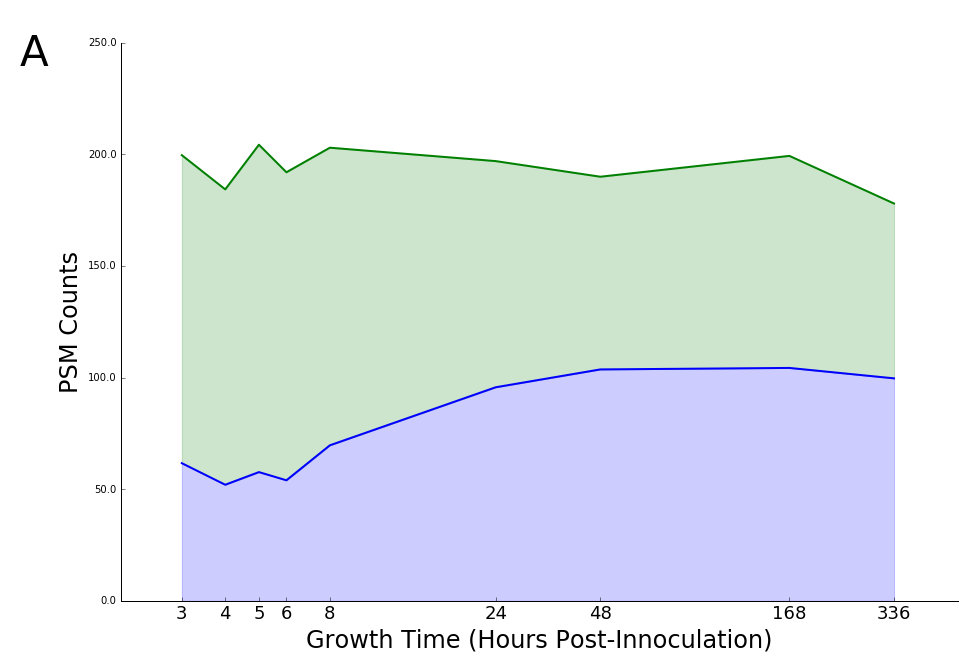

In [19]:
#top10_42Da = nt42Da_modFET.sort(columns=[('Modified','Overall'),],ascending=False)
modpept_42DaNt = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                                    (modified_pepts_fdr1['MassShift'] == 42)].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)

#modpept_42DaNt = modified_pept_fdr1[(modified_pept_fdr1['ModPosn_ProtCoord'] == 2) & 
#                                    ((modified_pept_fdr1['MassShift'] == 42) &
#                                     (modified_pept_fdr1['Locus'].isin(top10_42Da.index.get_level_values('Locus').values)))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept_42DaNt = unmodified_posn_fdr1.loc[(slice(None),modpept_42DaNt.index.get_level_values('Locus').values,2),slice(None)]
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(15)
mod_unmod_stacked_plot(modpept_42DaNt,unmodpept_42DaNt,base_fontsize=24)
plt.annotate('A',xy=(1,0),xytext=(0.02,.95),xycoords='figure fraction',textcoords='figure fraction',fontsize=42,horizontalalignment='left',verticalalignment='top')

plt.savefig('figures/FIG_8_A_42Da_all_ModUnmod_time_plot.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)


hi


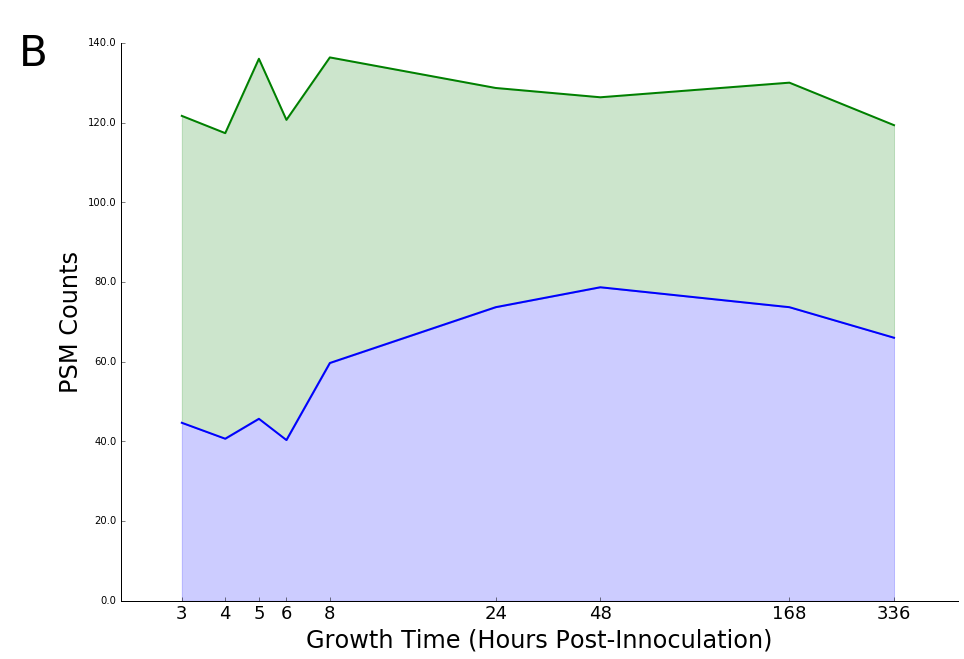

In [20]:
modpept_42DaNtSer = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                   ((modified_pepts_fdr1['MassShift'] == 42) &
                    (modified_pepts_fdr1['ModifiedResidue'] == 'S'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept_42DaNtSer = unmodified_posn_fdr1.loc[(slice(None),modpept_42DaNtSer.index.get_level_values('Locus').values,2),slice(None)]
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(15)
mod_unmod_stacked_plot(modpept_42DaNtSer,unmodpept_42DaNtSer)
plt.annotate('B',xy=(1,0),xytext=(0.02,.95),xycoords='figure fraction',textcoords='figure fraction',fontsize=42,horizontalalignment='left',verticalalignment='top')
plt.savefig('figures/FIG_8_B_42Da_Ser_ModUnmod_time_plot.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)


hi


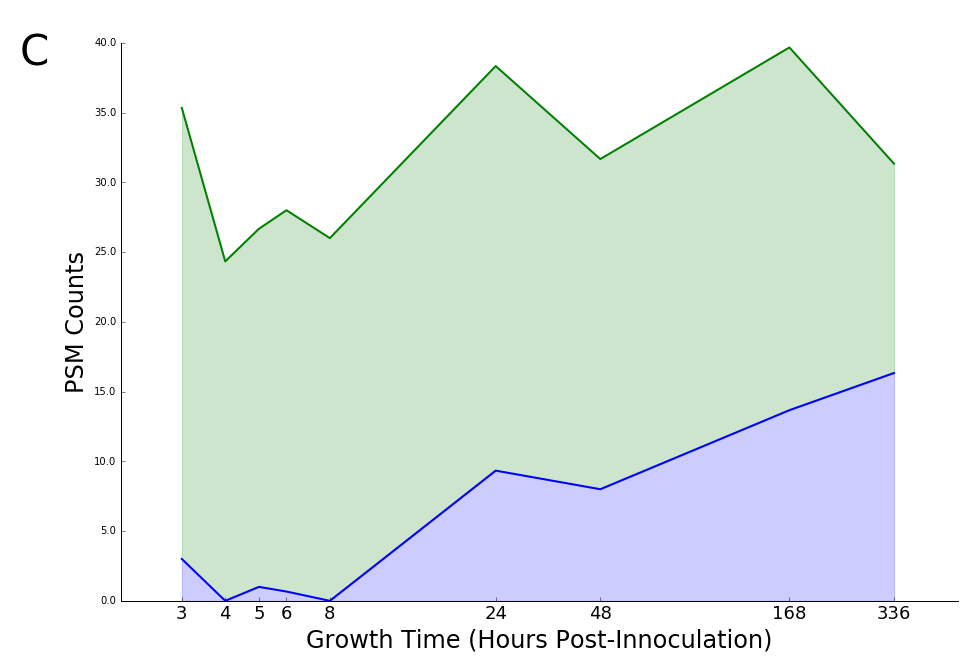

In [21]:
modpept_42DaNtThr = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                   ((modified_pepts_fdr1['MassShift'] == 42) &
                    (modified_pepts_fdr1['ModifiedResidue'] == 'T'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept_42DaNtThr = unmodified_posn_fdr1.loc[(slice(None),modpept_42DaNtThr.index.get_level_values('Locus').values,2),slice(None)]
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(15)
mod_unmod_stacked_plot(modpept_42DaNtThr,unmodpept_42DaNtThr)
plt.annotate('C',xy=(1,0),xytext=(0.02,.95),xycoords='figure fraction',textcoords='figure fraction',fontsize=42,horizontalalignment='left',verticalalignment='top')

#plt.legend(fontsize=24,loc='lower right')
plt.savefig('figures/FIG_8_C_42Da_Thr_ModUnmod_time_plot.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)

hi


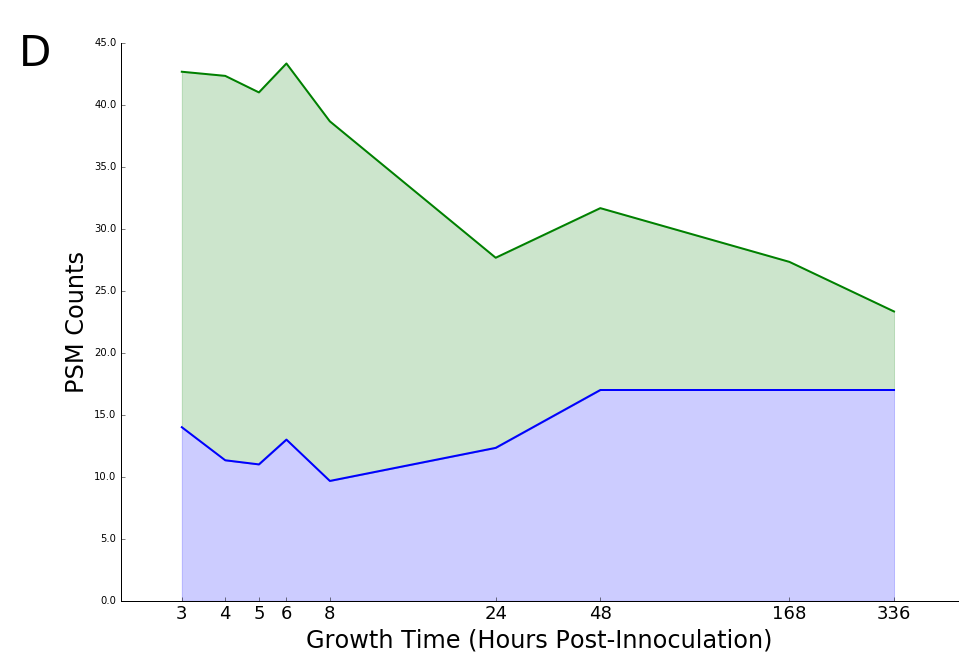

In [22]:
modpept_42DaNtAla = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                   ((modified_pepts_fdr1['MassShift'] == 42) &
                    (modified_pepts_fdr1['ModifiedResidue'] == 'A'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept_42DaNtAla = unmodified_posn_fdr1.loc[(slice(None),modpept_42DaNtAla.index.get_level_values('Locus').values,2),slice(None)]
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(15)
mod_unmod_stacked_plot(modpept_42DaNtAla,unmodpept_42DaNtAla)
plt.annotate('D',xy=(1,0),xytext=(0.02,.95),xycoords='figure fraction',textcoords='figure fraction',fontsize=42,horizontalalignment='left',verticalalignment='top')

plt.savefig('figures/FIG_8_D_42Da_Ala_ModUnmod_time_plot.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)


# Figure 11 & Additional File 5

### Modified and unmodified counts for +129 Da modification to Glu 

In [23]:
modFET_129DaGlu = posn_modFET_fdr1_peptNtflt.loc[(slice(None),slice(None),slice(None),'E',129),slice(None)]
modFET_129DaGlu.sortlevel(axis=1,level='BiolRep',inplace=True)
modFET_129DaGlu_srt = sort_modFET_table(modFET_129DaGlu)
modFET_129DaGlu_srt.to_csv("data/ADDITIONAL_FILE_5_MODa_129DaGluProteins.tsv",sep="\t")


/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[('rpsF', 131), ('yfiA', 113), ('rpsF', 130), ('yfiA', 112)]
rpsF
131
>rpsF_E131
AGDSEEXXXXX
yfiA
113
>yfiA_E113
EEVEEEXXXXX


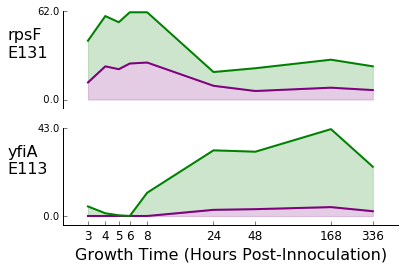

In [24]:
posn_sig_less_FET = modFET_129DaGlu_srt.iloc[:5]#filter_consistent(posn_modFET_fdr1.loc[slice(None),(slice(None),'less_pValue')])
modpept = modified_pepts_fdr1[((modified_pepts_fdr1['MassShift'] == 129) & 
                               (modified_pepts_fdr1['ModifiedResidue'] == 'E')) &
                              (modified_pepts_fdr1['ModPosn_ProtCoord'] == modified_pepts_fdr1['Length'])].groupby(['Locus','ModPosn_ProtCoord','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
lev_locus = posn_sig_less_FET.index.get_level_values('Locus').values
lev_modposn = posn_sig_less_FET.index.get_level_values('ModPosn_ProtCoord').values
level_vals = zip(lev_locus,lev_modposn)
print level_vals
modpept = modpept.reindex_axis(level_vals).dropna()
#print modpept_1DaAsnNt
nplots = len(level_vals)
plt.gcf().set_figheight(nplots*2)
plt.gcf().set_figwidth(6)
seq_out = open("data/modpept_129DaGlu_seqs_top%d.fa" % (nplots,),'w+')
for (i,((locus,posn),row)) in enumerate(modpept.iterrows()):
    win = 5
    print locus
    print posn
    modpept_loc = modpept.loc[(locus,posn),slice(None)]
    unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,posn),slice(None)]
    seq_window_f = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn-win,posn)),slice(None)]
    seq_window_r = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn+1,posn+win)),slice(None)]
    seq_f = "".join(seq_window_f.index.get_level_values('ModifiedResidue').values)
    seq_r = "".join(seq_window_r.index.get_level_values('ModifiedResidue').values)
    seq_f = ('X' * ((win-len(seq_f)) + 1)) + seq_f
    seq_r = seq_r + ('X' * (win-len(seq_r)))
    print >> seq_out, ">%s_E%d\n%s" % (locus,posn,seq_f + seq_r)
    print ">%s_E%d\n%s" % (locus,posn,seq_f + seq_r)
    plt.subplot(nplots,1,i+1)
    if i+1 == modpept.shape[0]:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nE%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=16,mod_color='purple')
    else:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nE%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=16,mod_color='purple')
plt.savefig('figures/FIG_S3_modpept_129DaNt_Glu_stackedModPlot_genes.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 12 (S4)

## Modified and unmodified counts for Nt-Ac targets w/ penultimate serine

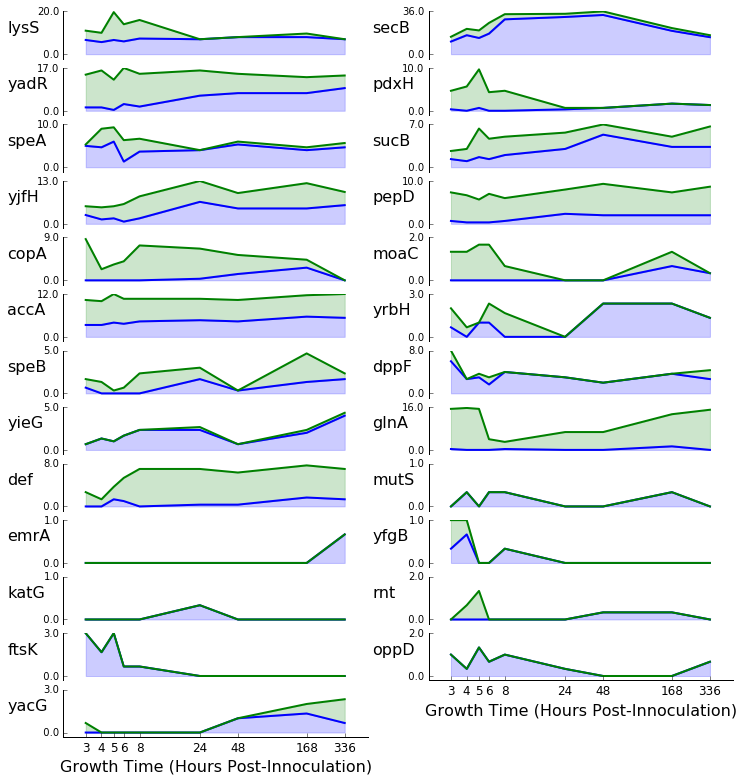

In [25]:
modpept_42DaNt = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                                ((modified_pepts_fdr1['MassShift'] == 42)&
                                 (modified_pepts_fdr1['ModifiedResidue'] == 'S'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
modpept_42DaNt = modpept_42DaNt.reindex_axis(modFET_42DaNt.index.get_level_values('Locus')).dropna()
nplots = modpept_42DaNt.index.get_level_values('Locus').values.shape[0]
nrows = np.ceil(nplots/2)
plt.gcf().set_figheight(nrows)
plt.gcf().set_figwidth(12)
for (i,locus) in enumerate(modpept_42DaNt.index.get_level_values('Locus').values):
    modpept_loc = modpept_42DaNt.loc[locus]
    unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,2),slice(None)]
    plt.subplot(nrows,2,i+1)
    if i+1 >= len(modpept_42DaNt.index.get_level_values('Locus').values) - 1:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=16)
    else:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=16)
plt.savefig('figures/FIG_S4_modpept_42DaNt_Ser_stackedModPlot_genes.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 13 (S5)

## Modified and unmodified counts for Nt-Ac targets w/ penultimate Threonine

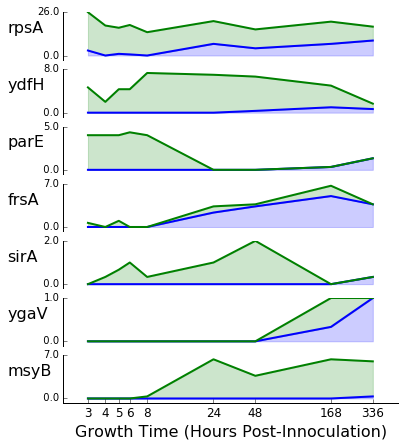

In [26]:
modpept_42DaNt = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                                ((modified_pepts_fdr1['MassShift'] == 42)&
                                 (modified_pepts_fdr1['ModifiedResidue'] == 'T'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
modpept_42DaNt = modpept_42DaNt.reindex_axis(modFET_42DaNt.index.get_level_values('Locus')).dropna()
nplots = modpept_42DaNt.index.get_level_values('Locus').values.shape[0]
plt.gcf().set_figheight(nplots)
plt.gcf().set_figwidth(6)
for (i,locus) in enumerate(modpept_42DaNt.index.get_level_values('Locus').values):
    modpept_loc = modpept_42DaNt.loc[locus]
    unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,2),slice(None)]
    plt.subplot(nplots,1,i+1)
    if i+1 == len(modpept_42DaNt.index.get_level_values('Locus').values):
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=16)
    else:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=16)
plt.savefig('figures/FIG_S5_modpept_42DaNt_Thr_stackedModPlot_genes.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 14 (S6)

## Modified and unmodified counts for Nt-Ac targets w/ penultimate Alanine

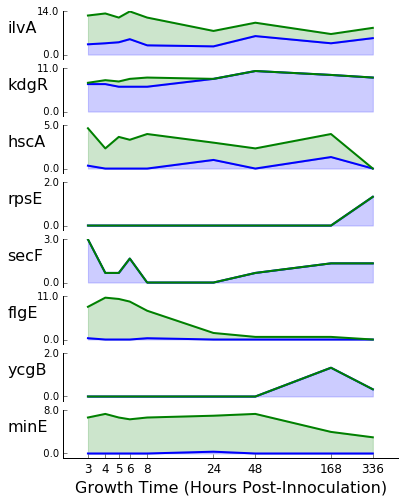

In [27]:
modpept_42DaNt = modified_pepts_fdr1[(modified_pepts_fdr1['ModPosn_ProtCoord'] == 2) & 
                                ((modified_pepts_fdr1['MassShift'] == 42)&
                                 (modified_pepts_fdr1['ModifiedResidue'] == 'A'))].groupby(['Locus','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
modpept_42DaNt = modpept_42DaNt.reindex_axis(modFET_42DaNt.index.get_level_values('Locus')).dropna()
nplots = modpept_42DaNt.index.get_level_values('Locus').values.shape[0]
plt.gcf().set_figheight(nplots)
plt.gcf().set_figwidth(6)
for (i,locus) in enumerate(modpept_42DaNt.index.get_level_values('Locus').values):
    modpept_loc = modpept_42DaNt.loc[locus]
    unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,2),slice(None)]
    plt.subplot(nplots,1,i+1)
    if i+1 == len(modpept_42DaNt.index.get_level_values('Locus').values):
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=16)
    else:
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label=locus,left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=16)
plt.savefig('figures/FIG_S6_modpept_42DaNt_Ala_stackedModPlot_genes.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 15 (S7) & Additional File 6

## Modified and unmodified asparagine +1Da targets across timepoints

In [28]:
modFET_1DaAsn = posn_modFET_fdr1_peptNtflt.loc[(slice(None),slice(None),slice(None),'N',1),slice(None)]
print modFET_1DaAsn.head()
modFET_1DaAsn.sortlevel(inplace=True,level='BiolRep',axis=1)
modFET_1DaAsn_srt = sort_modFET_table(modFET_1DaAsn)
modFET_1DaAsn_srt.to_csv("data/ADDITIONAL_FILE_6_MODa_1DaAspProteins.tsv",sep="\t")

BiolRep                                                          1           \
PeptCounts                                                  ExpMod ExpUnmod   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift                   
ECB_00002 thrA  311               N               1            0.0     34.0   
                313               N               1            0.0     34.0   
                520               N               1            0.0     34.0   
                548               N               1            1.0     45.0   
                776               N               1            0.0     56.0   

BiolRep                                                                  \
PeptCounts                                                  FET_logodds   
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue MassShift               
ECB_00002 thrA  311               N               1            0.000000   
                313               N               1                

/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[('sucB', 110), ('tufB', 64), ('hns', 77), ('rpsE', 77), ('cspC', 39), ('sucB', 111), ('rpsA', 544), ('rpsA', 113), ('rplN', 89), ('tpx', 16), ('ecnB', 37), ('stpA', 78), ('fabG', 145), ('atpD', 122), ('rpsE', 146)]
BiolRep                    1                                                 \
Time                     3     4     5     6     8    24    48    168   336   
Locus ModPosn_ProtCoord                                                       
sucB  110                0.0   0.0   0.0   0.0   0.0  6.0  10.0  11.0  12.0   
tufB  64                 3.0   4.0   4.0   6.0   4.0  6.0   7.0   9.0  15.0   
hns   77                 0.0   0.0   0.0   0.0   1.0  4.0   5.0  12.0  22.0   
rpsE  77                 2.0   1.0   0.0   1.0   2.0  0.0   3.0   7.0   6.0   
cspC  39                 5.0  10.0  13.0  13.0  11.0  0.0   3.0   4.0   0.0   
sucB  111                0.0   0.0   0.0   0.0   0.0  4.0   4.0   7.0   9.0   
rpsA  544                0.0   0.0   0.0   0.0   0.0  0.0   3.0   8.0  14

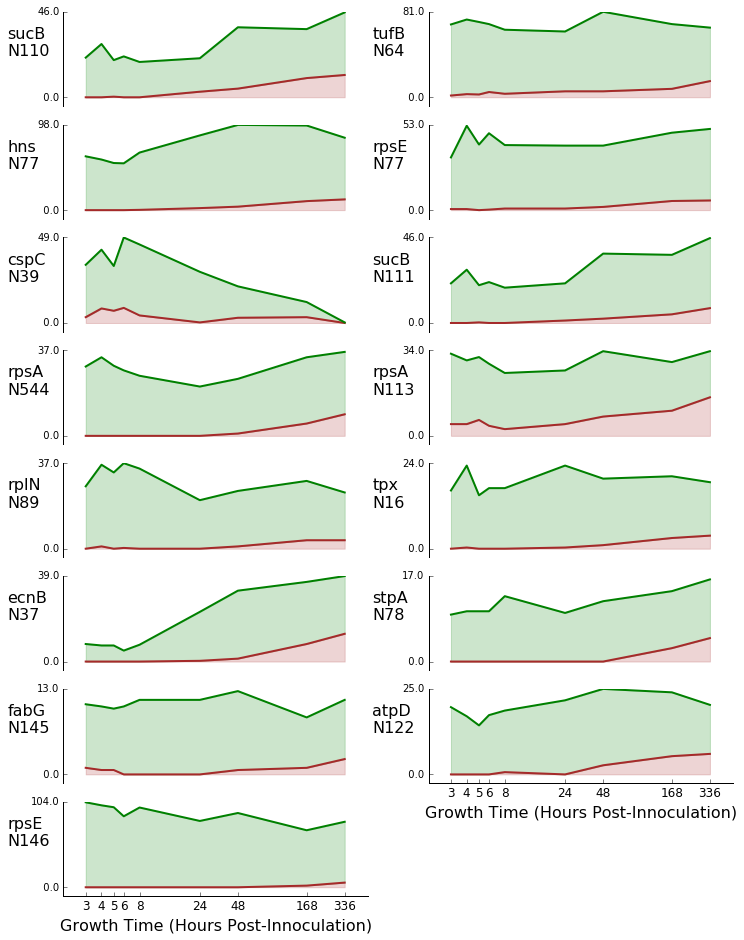

In [29]:
posn_sig_less_FET = modFET_1DaAsn_srt[:15]
modpept_1DaAsnNt = modified_pepts_fdr1[((modified_pepts_fdr1['MassShift'] == 1)&
                                     (modified_pepts_fdr1['ModifiedResidue'] == 'N'))].groupby(['Locus','ModPosn_ProtCoord','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
lev_locus = posn_sig_less_FET.index.get_level_values('Locus').values
lev_modposn = posn_sig_less_FET.index.get_level_values('ModPosn_ProtCoord').values
level_vals = zip(lev_locus,lev_modposn)
print level_vals
modpept_1DaAsnNt = modpept_1DaAsnNt.reindex_axis(level_vals).dropna()
print modpept_1DaAsnNt
nplots = modpept_1DaAsnNt.shape[0]
plt.gcf().set_figheight(nplots*2)
plt.gcf().set_figwidth(12)
seq_out = open("data/modpept_1DaAsn_seqs_top%d.fa" % (nplots,),'w+')
for (i,((locus,posn),row)) in enumerate(modpept_1DaAsnNt.iterrows()):
    win = 5
    print locus
    print posn
    modpept_loc = modpept_1DaAsnNt.loc[(locus,posn),slice(None)]
    unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,posn),slice(None)]
    seq_window_f = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn-win,posn)),slice(None)]
    seq_window_r = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn+1,posn+win)),slice(None)]
    seq_f = "".join(seq_window_f.index.get_level_values('ModifiedResidue').values)
    seq_r = "".join(seq_window_r.index.get_level_values('ModifiedResidue').values)
    seq_f = ('X' * ((win-len(seq_f)) + 1)) + seq_f
    seq_r = seq_r + ('X' * (win-len(seq_r)))
    print >> seq_out, ">%s_N%d\n%s" % (locus,posn,seq_f + seq_r)
    print ">%s_N%d\n%s" % (locus,posn,seq_f + seq_r)
    plt.subplot(nplots,2,i+1)
    if i+1 >= nplots - 1:
        print (1,i,nplots)
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nN%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=16,mod_color='brown')
    else:
        print (2,i,nplots)
        mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nN%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=16,mod_color='brown')
plt.savefig('figures/FIG_S7_modpept_1Da_Asn_stackedModPlot_genes.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 16 (S8) & Additional File 7

## Aggregate modified and unmodified counts for oxidation (+16Da) modifications to methionine

In [30]:
modFET_16DaMet = posn_modFET_fdr1_peptNtflt.loc[(slice(None),slice(None),slice(None),'M',16),slice(None)]
modFET_16DaMet.sortlevel(axis=1,level="BiolRep",inplace=True)
modFET_16DaMet_srt = sort_modFET_table(modFET_16DaMet)
modFET_16DaMet_srt_pvtwotail = modFET_16DaMet_srt.sort(columns=[('Mean','twotail_pValue')])
modFET_16DaMet_srt_pvtwotail.to_csv("data/ADDITIONAL_FILE_7_MODa_16DaMetProteins.tsv",sep="\t")
#modFET_16DaMet_srt_pvgreater = modFET_16DaMet_srt.sort(columns=('Mean','greater_pValue'))
#modFET_16DaMet_srt_pct = modFET_16DaMet_srt.sort(columns=('PercentMod','Overall'),ascending=False)
#modFET_16DaMet_srt_modcnt = modFET_16DaMet_srt.sort(columns=('Modified','Overall'),ascending=False)
modFET_16DaMet_srt_pvtwotail.loc[slice(None),(slice(None),'twotail_pValue')]

/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,,,,BiolRep,1,2,3,Mean
,,,,PeptCounts,twotail_pValue,twotail_pValue,twotail_pValue,twotail_pValue
LocusTag,Locus,ModPosn_ProtCoord,ModifiedResidue,MassShift,,,,
ECB_02624,eno,94,M,16,2.642372e-04,2.703164e-02,0.000218,0.009171
ECB_04013,groEL,307,M,16,2.246693e-02,4.183475e-16,0.006737,0.009735
ECB_03648,ilvE,255,M,16,4.824872e-02,1.489061e-02,0.001760,0.021633
ECB_01215,adhE,59,M,16,4.497293e-02,1.297720e-02,0.033067,0.030339
ECB_03648,ilvE,80,M,16,1.224982e-02,3.163595e-03,0.101895,0.039103
ECB_02314,cysK,49,M,16,5.714630e-02,1.445678e-02,0.066568,0.046057
ECB_04013,groEL,514,M,16,4.365977e-02,7.300734e-02,0.121767,0.079478
ECB_00892,trxB,216,M,16,4.545136e-08,5.403037e-03,0.273716,0.093040


                                                  unmodCount              \
BiolRep                                                    1               
Time                                                     3     4     5     
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue                          
ECB_00002 thrA  255               M                      9.0  11.0  12.0   
                317               M                      8.0   8.0   8.0   
                325               M                      8.0   8.0   8.0   
                406               M                      6.0   2.0   0.0   
                586               M                     13.0  15.0  18.0   

                                                                           \
BiolRep                                                                     
Time                                                6     8     24    48    
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue                           
ECB_000

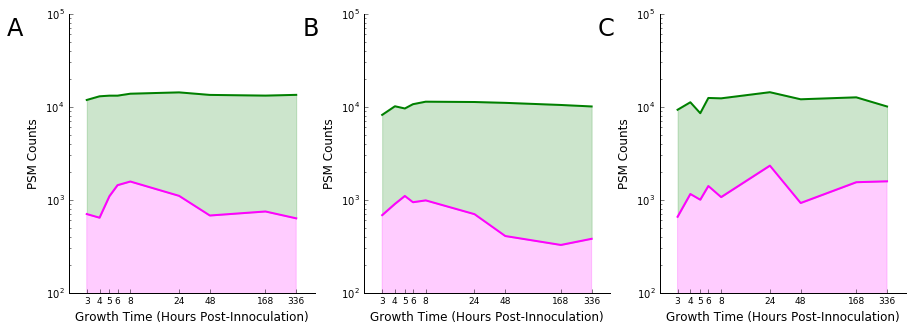

In [37]:
modpept = modified_pepts_fdr1_peptNtflt[(modified_pepts_fdr1_peptNtflt['MassShift'] == 16) & (modified_pepts_fdr1_peptNtflt['ModifiedResidue'] == 'M')].groupby(['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept = unmodified_posn_fdr1.reindex_axis(modpept.index)
print unmodpept.head()
print modpept.head()
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(15)
annot = ['A','B','C']
for i in (1,2,3):
    plt.subplot(1,3,i)
    mod_unmod_stacked_plot(modpept.loc[slice(None),(i,slice(None))],unmodpept.loc[slice(None),('unmodCount',i,slice(None))],legend=False,bottom_ax=True,base_fontsize=12,mod_color='magenta')
    plt.annotate(annot[i-1],xy=(1,0),xytext=(-0.25,.99),xycoords='axes fraction',textcoords='axes fraction',fontsize=24,horizontalalignment='left',verticalalignment='top')
    plt.yscale('log')
plt.savefig('figures/FIG_S8_modpept_16DaMet_stackedModPlot_pooledrepl.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 17 (S9) 

## Modified and unmodified counts for individual oxidation (+16Da) modifications to methionine, separated by biological replicate

[('eno', 94), ('groEL', 307), ('ilvE', 255), ('adhE', 59), ('ilvE', 80), ('cysK', 49), ('groEL', 514), ('trxB', 216), ('dppA', 265), ('mglB', 61)]
eno
94
>eno_M94
GIDKIMIDLDG
groEL
307
>groEL_M307
SEEIGMELEKA
ilvE
255
>ilvE_M255
ADEVFMSGTAA
adhE
59
>adhE_M59
VAESGMGIVED
ilvE
80
>ilvE_M80
SIDELMEACRD
cysK
49
>cysK_M49
XIGANMIWDAE
groEL
514
>groEL_M514
SVAGLMITTEC
trxB
216
>trxB_M216
VTGDQMGVTGV
dppA
265
>dppA_M265
NECQVMPYPNP
mglB
61
>mglB_M61
DVQLLMNDSQN


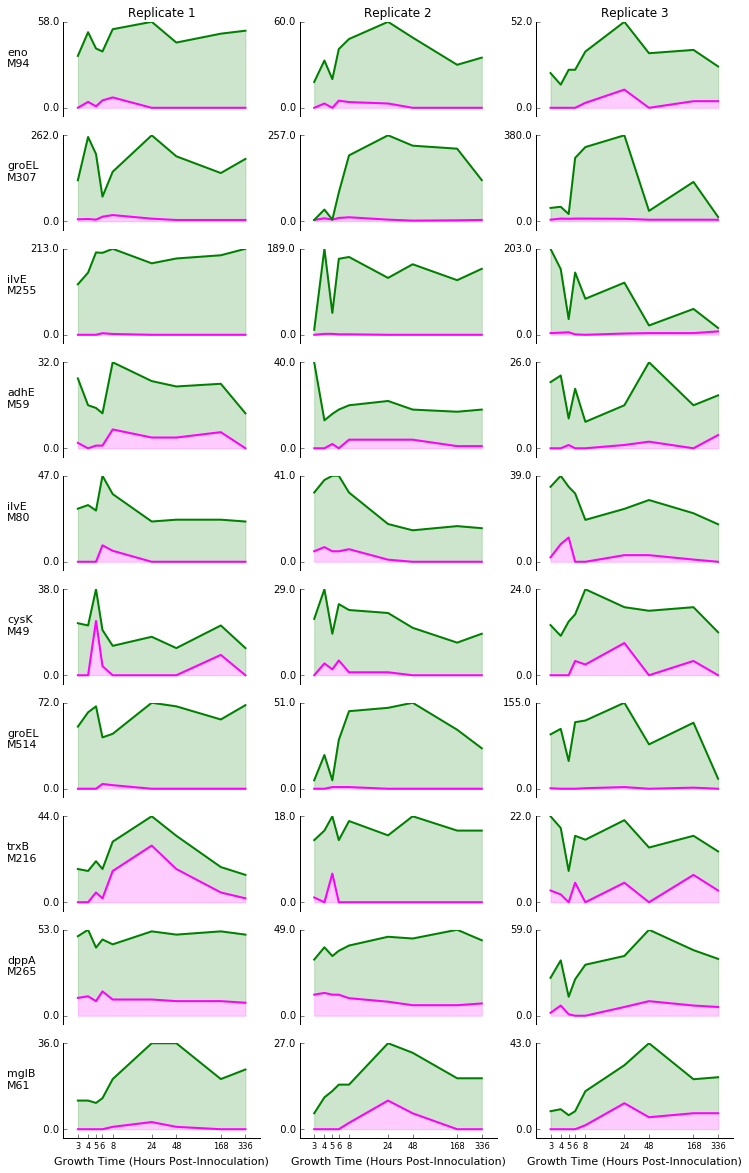

In [32]:
posn_sig_less_FET = modFET_16DaMet_srt_pvtwotail.iloc[:10]#filter_consistent(posn_modFET_fdr1.loc[slice(None),(slice(None),'less_pValue')])
modpept = modified_pepts_fdr1_peptNtflt[(modified_pepts_fdr1_peptNtflt['MassShift'] == 16) & (modified_pepts_fdr1_peptNtflt['ModifiedResidue'] == 'M')].groupby(['Locus','ModPosn_ProtCoord','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
lev_locus = posn_sig_less_FET.index.get_level_values('Locus').values
lev_modposn = posn_sig_less_FET.index.get_level_values('ModPosn_ProtCoord').values
level_vals = zip(lev_locus,lev_modposn)
print level_vals
modpept = modpept.reindex_axis(level_vals).dropna()
#print modpept_1DaAsnNt
nplots = len(level_vals)
plt.gcf().set_figheight(nplots*2)
plt.gcf().set_figwidth(12)
seq_out = open("data/modpept_1DaAsn_seqs_top%d.fa" % (nplots,),'w+')
for (i,((locus,posn),row)) in enumerate(modpept.iterrows()):
    win = 5
    print locus
    print posn
    seq_window_f = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn-win,posn)),slice(None)]
    seq_window_r = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn+1,posn+win)),slice(None)]
    seq_f = "".join(seq_window_f.index.get_level_values('ModifiedResidue').values)
    seq_r = "".join(seq_window_r.index.get_level_values('ModifiedResidue').values)
    seq_f = ('X' * ((win-len(seq_f)) + 1)) + seq_f
    seq_r = seq_r + ('X' * (win-len(seq_r)))
    print >> seq_out, ">%s_M%d\n%s" % (locus,posn,seq_f + seq_r)
    print ">%s_M%d\n%s" % (locus,posn,seq_f + seq_r)
    for j in (1,2,3):
        plt.subplot(nplots,3,(i*3)+j)
        modpept_loc = modpept.loc[(locus,posn),(j,slice(None))]
        unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,posn),('unmodCount',j,slice(None))]

        if (i == modpept.shape[0] - 1) and j == 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nM%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=11,mod_color='magenta')   
        elif i == modpept.shape[0] - 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="",left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=11,mod_color='magenta')   
        elif j == 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nM%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=11,mod_color='magenta')   
        else:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="",left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=11,mod_color='magenta')
        #plt.yscale('log')
        
        if i == 0:
            plt.title("Replicate %d" % (j,))
plt.savefig('figures/FIG_S9_modpept_16Da_Met_stackedModPlot_genes_repl.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 18 (S10)

## Aggregate modified and unmodified counts for oxidation (+16Da) modifications to tryptophan

                                                  unmodCount              \
BiolRep                                                    1               
Time                                                     3     4     5     
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue                          
ECB_00004 thrC  309               W                     11.0  16.0  20.0   
ECB_00014 dnaK  102               W                     55.0  68.0  78.0   
ECB_00057 surA  413               W                     10.0  19.0  11.0   
ECB_00075 leuB  205               W                      9.0  17.0  18.0   
ECB_00113 aceE  288               W                      9.0  12.0  11.0   

                                                                              \
BiolRep                                                                        
Time                                                6      8      24     48    
LocusTag  Locus ModPosn_ProtCoord ModifiedResidue                          

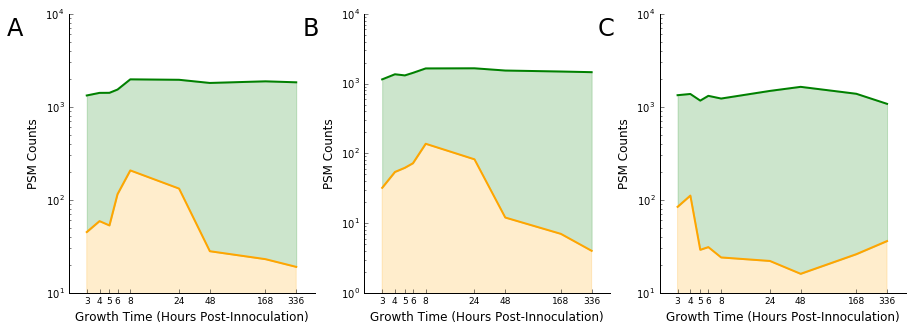

In [33]:
modpept = modified_pepts_fdr1_peptNtflt[(modified_pepts_fdr1_peptNtflt['MassShift'] == 16) & (modified_pepts_fdr1_peptNtflt['ModifiedResidue'] == 'W')].groupby(['LocusTag','Locus','ModPosn_ProtCoord','ModifiedResidue','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
unmodpept = unmodified_posn_fdr1.reindex_axis(modpept.index)
print unmodpept.head()
print modpept.head()
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(15)
annot = ['A','B','C']
for i in (1,2,3):
    plt.subplot(1,3,i)
    mod_unmod_stacked_plot(modpept.loc[slice(None),(i,slice(None))],unmodpept.loc[slice(None),('unmodCount',i,slice(None))],legend=False,bottom_ax=True,base_fontsize=12,mod_color='orange')
    plt.annotate(annot[i-1],xy=(1,0),xytext=(-0.25,.99),xycoords='axes fraction',textcoords='axes fraction',fontsize=24,horizontalalignment='left',verticalalignment='top')
    plt.yscale('log')
plt.savefig('figures/FIG_S10_modpept_16DaTrp_stackedModPlot_pooledrepl.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 

# Figure 19 (S11) & Additional File 8

## Modified and unmodified counts for individual oxidation (+16Da) modifications to tryptophan, separated by biological replicate

In [36]:
modFET_16DaTrp = posn_modFET_fdr1_peptNtflt.loc[(slice(None),slice(None),slice(None),'W',16),slice(None)]
modFET_16DaTrp.sortlevel(axis=1,level='BiolRep',inplace=True)
modFET_16DaTrp_srt = sort_modFET_table(modFET_16DaTrp)
modFET_16DaTrp_srt_pvgreater = modFET_16DaTrp_srt.sort(columns=[('Mean','twotail_pValue')])
modFET_16DaTrp_srt_pvgreater.to_csv("data/ADDITIONAL_FILE_8_MODa_16DaTrpProteins.tsv",sep="\t")


/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barricklab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


[('dnaK', 102), ('metE', 169), ('gapA', 311), ('tufB', 185), ('icdA', 83), ('metE', 374), ('rplF', 62), ('hslU', 381), ('thrC', 309), ('fabF', 25)]
dnaK
102
>dnaK_W102
DNGDAWVEVKX
metE
169
>metE_W169
PVTWLWLGKXX
gapA
311
>gapA_W311
VKLVSWYDNET
tufB
185
>tufB_W185
EGDAEWEAKIL
icdA
83
>icdA_W83
YGQDVWLPAET
metE
374
>metE_W374
AALAEWSAPIQ
rplF
62
>rplF_W62
GYADGWAQAGT
hslU
381
>hslU_W381
IAEAAWQVNES
thrC
309
>thrC_W309
SQPNNWPRVEE
fabF
25
>fabF_W25
TVESTWKALLA


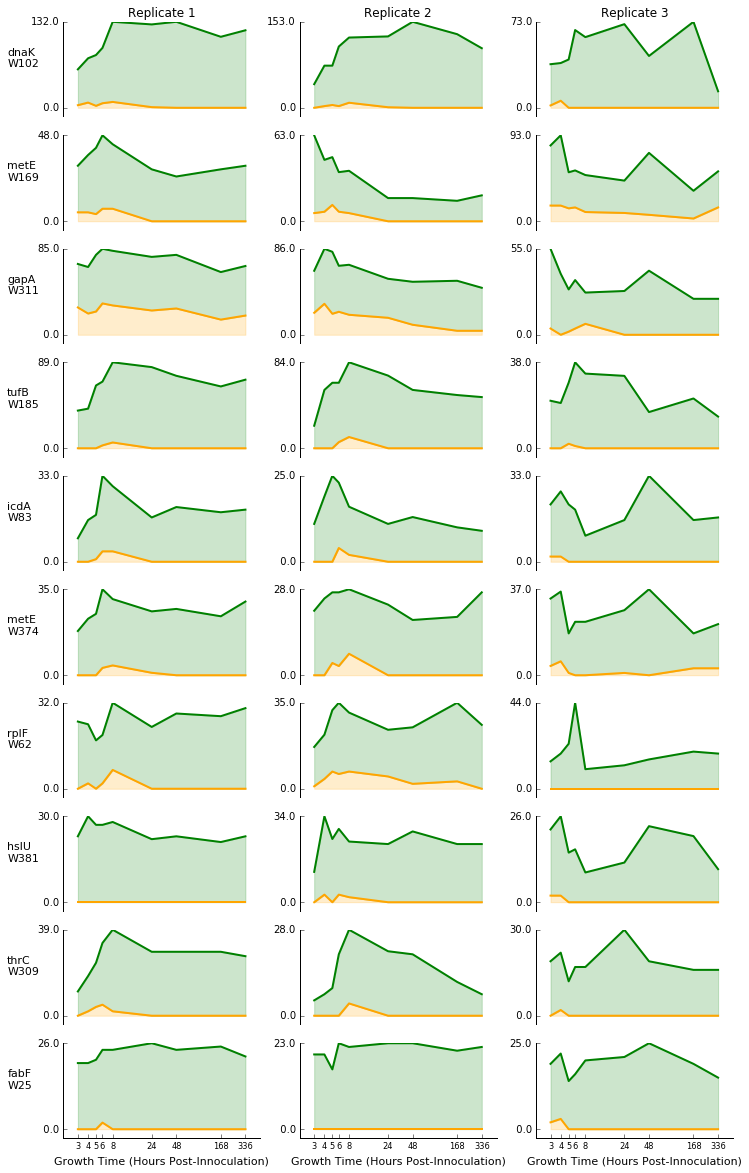

In [35]:
posn_sig_less_FET = modFET_16DaTrp_srt_pvgreater.iloc[:10]#filter_consistent(posn_modFET_fdr1.loc[slice(None),(slice(None),'less_pValue')])
modpept = modified_pepts_fdr1_peptNtflt[(modified_pepts_fdr1_peptNtflt['MassShift'] == 16) & (modified_pepts_fdr1_peptNtflt['ModifiedResidue'] == 'W')].groupby(['Locus','ModPosn_ProtCoord','Time','BiolRep']).count()['Index'].unstack('BiolRep').unstack('Time').fillna(0)
lev_locus = posn_sig_less_FET.index.get_level_values('Locus').values
lev_modposn = posn_sig_less_FET.index.get_level_values('ModPosn_ProtCoord').values
level_vals = zip(lev_locus,lev_modposn)
print level_vals
modpept = modpept.reindex_axis(level_vals).dropna()
#print modpept_1DaAsnNt
nplots = len(level_vals)
plt.gcf().set_figheight(nplots*2)
plt.gcf().set_figwidth(12)
seq_out = open("data/modpept_1DaAsn_seqs_top%d.fa" % (nplots,),'w+')
for (i,((locus,posn),row)) in enumerate(modpept.iterrows()):
    win = 5
    print locus
    print posn
    seq_window_f = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn-win,posn)),slice(None)]
    seq_window_r = unmodified_posn_fdr1.loc[(slice(None),locus,slice(posn+1,posn+win)),slice(None)]
    seq_f = "".join(seq_window_f.index.get_level_values('ModifiedResidue').values)
    seq_r = "".join(seq_window_r.index.get_level_values('ModifiedResidue').values)
    seq_f = ('X' * ((win-len(seq_f)) + 1)) + seq_f
    seq_r = seq_r + ('X' * (win-len(seq_r)))
    print >> seq_out, ">%s_W%d\n%s" % (locus,posn,seq_f + seq_r)
    print ">%s_W%d\n%s" % (locus,posn,seq_f + seq_r)
    for j in (1,2,3):
        plt.subplot(nplots,3,(i*3)+j)
        modpept_loc = modpept.loc[(locus,posn),(j,slice(None))]
        unmodpept_loc = unmodified_posn_fdr1.loc[(slice(None),locus,posn),('unmodCount',j,slice(None))]

        if (i == modpept.shape[0] - 1) and j == 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nW%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=11,mod_color='orange')   
        elif i == modpept.shape[0] - 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="",left_ax_rot=True,legend=False,bottom_ax=True,base_fontsize=11,mod_color='orange')   
        elif j == 1:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="%s\nW%d" % (locus,posn),left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=11,mod_color='orange')   
        else:
            mod_unmod_stacked_plot(modpept_loc,unmodpept_loc,left_ax=False,left_ax_label="",left_ax_rot=True,legend=False,bottom_ax=False,base_fontsize=11,mod_color='orange')
        #plt.yscale('log')
        
        if i == 0:
            plt.title("Replicate %d" % (j,))
plt.savefig('figures/FIG_S11_modpept_16DaTrp_stackedModPlot_genes_repl.pdf',format='pdf',bbox_inches='tight',pad_inches=0.5) 